In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

mainpath = "C://Users/lgces/Documents/GitHub/python-ml-course/datasets/"
data_ads = pd.read_csv(mainpath+'ads/advertising.csv')
data_ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
data_ads['corrn'] = (data_ads['TV'] - np.mean(data_ads['TV']))*(data_ads['Sales'] - np.mean(data_ads['Sales']))
data_ads

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956
196,94.2,4.9,8.1,9.7,228.411706
197,177.0,9.3,6.4,12.8,-36.623044
198,283.6,42.0,66.2,25.5,1567.338706


In [7]:
data_ads['corr1'] = (data_ads['TV'] - np.mean(data_ads['TV']))**2
data_ads

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956,11846.689806
196,94.2,4.9,8.1,9.7,228.411706,2792.329806
197,177.0,9.3,6.4,12.8,-36.623044,897.451806
198,283.6,42.0,66.2,25.5,1567.338706,18647.950806


In [8]:
data_ads['corr2'] = (data_ads['Sales'] - np.mean(data_ads['Sales']))**2

In [9]:
#Person's Correlation
corr_pearson = sum(data_ads['corrn'])/np.sqrt(sum(data_ads['corr1'])*sum(data_ads['corr2']))
corr_pearson 

0.782224424861606

In [10]:
#FUNCTION
def corr_coeff(df, var1, var2):
    df['corrn'] = (df[var1] - np.mean(df[var1]))*(df[var2] - np.mean(df[var2]))
    df['corr1'] = (df[var1] - np.mean(df[var1]))**2
    df['corr2'] = (df[var2] - np.mean(df[var2]))**2
    corr_pearson = sum(df['corrn'])/np.sqrt(sum(df['corr1'])*sum(df['corr2']))
    return corr_pearson

corr_coeff(data_ads, 'Radio', 'Sales')

0.5762225745710553

In [15]:
cols = data_ads.columns.values
cols

for x in cols:
    for y in cols:  
        print(x+ ','+y+':'+str(corr_coeff(data_ads,x,y)))

TV,TV:1.0
TV,Radio:0.05480866446583009
TV,Newspaper:0.056647874965056993
TV,Sales:0.782224424861606
Radio,TV:0.05480866446583009
Radio,Radio:1.0
Radio,Newspaper:0.3541037507611752
Radio,Sales:0.5762225745710553
Newspaper,TV:0.056647874965056993
Newspaper,Radio:0.3541037507611752
Newspaper,Newspaper:1.0
Newspaper,Sales:0.22829902637616525
Sales,TV:0.782224424861606
Sales,Radio:0.5762225745710553
Sales,Newspaper:0.22829902637616525
Sales,Sales:1.0


Text(0.5, 1.0, 'Gasto en TV vs. vnetas del producto ')

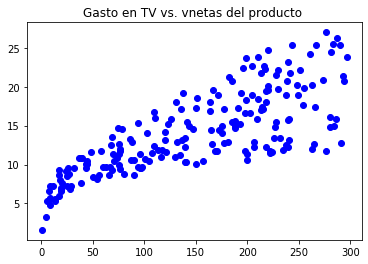

In [23]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'bo')
plt.title('Gasto en TV vs. ventas del producto ')

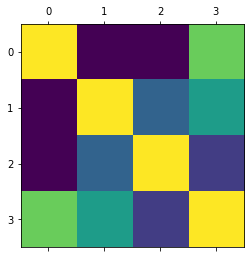

In [25]:
#Pandas CORR Function
data_ads.corr()
plt.matshow(data_ads.corr()) #Draw the correlation matrix of Df 